In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
satislar = pd.read_csv('satislar_ilan.csv')
haklar = pd.read_csv('haklar_log.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
satislar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115537 entries, 0 to 115536
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TeklifId             115537 non-null  int64  
 1   SatisId              115537 non-null  int64  
 2   MusteriKodu          115537 non-null  int64  
 3   satisyapan           115537 non-null  object 
 4   Bolum2               115504 non-null  object 
 5   Bolum3               115504 non-null  object 
 6   Bolum4               113902 non-null  object 
 7   SatisTipi            115537 non-null  object 
 8   SozlesmeNo           115537 non-null  object 
 9   SatisGirisTarihi     115537 non-null  object 
 10  Donem                115537 non-null  object 
 11  SozlesmeBaslangic    115537 non-null  object 
 12  SozlesmeBitis        115537 non-null  object 
 13  MarkaAdi             115537 non-null  object 
 14  UrunAdi              115537 non-null  object 
 15  UrunTanimi       

In [5]:
haklar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877062 entries, 0 to 877061
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CompanyRightLogKey   877062 non-null  int64  
 1   FirmKey              877062 non-null  int64  
 2   FirmUserKey          876875 non-null  float64
 3   CompanyRightKey      877062 non-null  int64  
 4   IP                   839676 non-null  object 
 5   UsageCount           877062 non-null  float64
 6   CreationDate         877062 non-null  object 
 7   LastModifiedDate     877062 non-null  object 
 8   ReferanceId          876933 non-null  float64
 9   CompanyRightKey.1    877062 non-null  int64  
 10  FirmKey.1            877062 non-null  int64  
 11  CompanyRightTypeKey  877062 non-null  int64  
 12  Right                877062 non-null  float64
 13  UsedRight            877062 non-null  float64
 14  SalesId              877062 non-null  int64  
 15  ContractNo       

In [6]:
satislar.rename(columns={'SatisId':'SalesId'}, inplace=True)

In [7]:
haklar.rename(columns={'CreationDate.1':'RightStartDate'}, inplace=True)

In [8]:
haklar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877062 entries, 0 to 877061
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CompanyRightLogKey   877062 non-null  int64  
 1   FirmKey              877062 non-null  int64  
 2   FirmUserKey          876875 non-null  float64
 3   CompanyRightKey      877062 non-null  int64  
 4   IP                   839676 non-null  object 
 5   UsageCount           877062 non-null  float64
 6   CreationDate         877062 non-null  object 
 7   LastModifiedDate     877062 non-null  object 
 8   ReferanceId          876933 non-null  float64
 9   CompanyRightKey.1    877062 non-null  int64  
 10  FirmKey.1            877062 non-null  int64  
 11  CompanyRightTypeKey  877062 non-null  int64  
 12  Right                877062 non-null  float64
 13  UsedRight            877062 non-null  float64
 14  SalesId              877062 non-null  int64  
 15  ContractNo       

In [9]:
satislar['SozlesmeBaslangic'] = pd.to_datetime(satislar['SozlesmeBaslangic'])
satislar['SozlesmeBitis'] = pd.to_datetime(satislar['SozlesmeBitis'])

In [10]:
haklar['CreationDate'] = pd.to_datetime(haklar['CreationDate'].apply(lambda x: x[:10]))
haklar['RightStartDate'] = pd.to_datetime(haklar['RightStartDate'].apply(lambda x: x[:10]))
haklar['LastModifyDate'] = pd.to_datetime(haklar['LastModifyDate'].apply(lambda x: x[:10]))

In [11]:
haklar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877062 entries, 0 to 877061
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CompanyRightLogKey   877062 non-null  int64         
 1   FirmKey              877062 non-null  int64         
 2   FirmUserKey          876875 non-null  float64       
 3   CompanyRightKey      877062 non-null  int64         
 4   IP                   839676 non-null  object        
 5   UsageCount           877062 non-null  float64       
 6   CreationDate         877062 non-null  datetime64[ns]
 7   LastModifiedDate     877062 non-null  object        
 8   ReferanceId          876933 non-null  float64       
 9   CompanyRightKey.1    877062 non-null  int64         
 10  FirmKey.1            877062 non-null  int64         
 11  CompanyRightTypeKey  877062 non-null  int64         
 12  Right                877062 non-null  float64       
 13  UsedRight     

In [12]:
haklar['ContractEndDate'] = haklar['ContractEndDate'].astype(str).apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])

In [13]:
haklar['ContractEndDate'] = pd.to_datetime(haklar['ContractEndDate'])

In [14]:
haklar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877062 entries, 0 to 877061
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CompanyRightLogKey   877062 non-null  int64         
 1   FirmKey              877062 non-null  int64         
 2   FirmUserKey          876875 non-null  float64       
 3   CompanyRightKey      877062 non-null  int64         
 4   IP                   839676 non-null  object        
 5   UsageCount           877062 non-null  float64       
 6   CreationDate         877062 non-null  datetime64[ns]
 7   LastModifiedDate     877062 non-null  object        
 8   ReferanceId          876933 non-null  float64       
 9   CompanyRightKey.1    877062 non-null  int64         
 10  FirmKey.1            877062 non-null  int64         
 11  CompanyRightTypeKey  877062 non-null  int64         
 12  Right                877062 non-null  float64       
 13  UsedRight     

In [15]:
haklar['ContDuration'] = np.ceil((haklar['ContractEndDate'].dt.date - haklar['RightStartDate'].dt.date)/np.timedelta64(1, 'M')).astype(int)


In [16]:
haklar

,CompanyRightLogKey,FirmKey,FirmUserKey,CompanyRightKey,IP,UsageCount,CreationDate,LastModifiedDate,ReferanceId,CompanyRightKey.1,FirmKey.1,CompanyRightTypeKey,Right,UsedRight,SalesId,ContractNo,ContractEndDate,Priority,RightStartDate,LastModifyDate,IsActive,ReferenceRightId,ActivationTypeId,ContDuration
0,5881632,22034,952204.0,1652511,31.145.138.55,1.0,2022-03-01,2022-03-01 10:47:22.340000,3013385.0,1652511,22034,1,30.0,30.0,1630199,NaN,2023-12-30,50,2021-12-02,2022-04-11,True,1649487.0,1,25
1,5881728,22034,952204.0,1652511,31.145.138.55,1.0,2022-03-01,2022-03-01 10:53:04.820000,3013401.0,1652511,22034,1,30.0,30.0,1630199,NaN,2023-12-30,50,2021-12-02,2022-04-11,True,1649487.0,1,25
2,5882590,43951,14836.0,1669812,212.252.192.100,1.0,2022-03-01,2022-03-01 11:37:25.613000,3013500.0,1669812,43951,1,6.0,6.0,1645951,NaN,2022-12-24,50,2021-12-24,2022-05-09,True,NaN,1,12
3,5882704,39585,930856.0,1513242,46.155.61.106,1.0,2022-03-01,2022-03-01 11:44:29.877000,2790998.0,1513242,39585,1,750.0,750.0,1573378,NaN,2023-06-15,50,2021-06-29,2022-05-09,True,NaN,1,24
4,5883001,9629,830712.0,1716217,195.175.202.38,1.0,2022-03-01,2022-03-01 12:01:52.533000,2874366.0,1716217,9629,1,75.0,75.0,1666073,NaN,2024-02-22,50,2022-02-22,2023-01-19,True,NaN,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877057,17862517,301763,1069945.0,1792756,176.237.201.222,1.0,2023-04-07,2023-04-07 12:01:51.390000,3123326.0,1792756,301763,1,12.0,9.0,1704558,NaN,2023-05-21,50,2022-05-21,2023-04-30,True,NaN,1,12
877058,17879638,307753,1088206.0,2196984,78.188.46.231,1.0,2023-04-10,2023-04-10 15:11:03.660000,3437771.0,2196984,307753,1,3.0,1.0,1827904,NaN,2024-04-06,50,2023-04-07,2023-04-10,True,NaN,1,12
877059,17795773,308030,1198969.0,2181212,176.55.133.223,1.0,2023-03-30,2023-03-30 15:24:44.520000,3426087.0,2181212,308030,1,3.0,3.0,1822640,NaN,2024-03-23,50,2023-03-24,2023-03-30,True,NaN,1,12
877060,18027597,301763,1069945.0,1792756,176.237.192.17,1.0,2023-04-30,2023-04-30 13:29:21.930000,3123312.0,1792756,301763,1,12.0,9.0,1704558,NaN,2023-05-21,50,2022-05-21,2023-04-30,True,NaN,1,12


In [17]:
haklar.isna().any()

CompanyRightLogKey     False
FirmKey                False
FirmUserKey             True
CompanyRightKey        False
IP                      True
UsageCount             False
CreationDate           False
LastModifiedDate       False
ReferanceId             True
CompanyRightKey.1      False
FirmKey.1              False
CompanyRightTypeKey    False
Right                  False
UsedRight              False
SalesId                False
ContractNo              True
ContractEndDate        False
Priority               False
RightStartDate         False
LastModifyDate         False
IsActive               False
ReferenceRightId        True
ActivationTypeId       False
ContDuration           False
dtype: bool

In [18]:
haklar.drop(['FirmUserKey','IP', 'ReferanceId','ContractNo','ReferenceRightId'], axis=1,inplace=True)

In [19]:
satislar.isna().any()

TeklifId               False
SalesId                False
MusteriKodu            False
satisyapan             False
Bolum2                  True
Bolum3                  True
Bolum4                  True
SatisTipi              False
SozlesmeNo             False
SatisGirisTarihi       False
Donem                  False
SozlesmeBaslangic      False
SozlesmeBitis          False
MarkaAdi               False
UrunAdi                False
UrunTanimi             False
PaketAdi               False
BirimAdet              False
UrunGelir              False
PaylasimOrani          False
EkUrunMu               False
PaketKodu              False
LinkDurumu              True
FaturaKodu              True
SozlesmePaketi         False
YenilemeTipi           False
IsGunu                 False
IsGunu_Kosul           False
UrunGrubu              False
AnaUrunGrubu           False
Butce_Urun             False
Butce_Urun2            False
ListeFiyati            False
UniqId                 False
OncekiSozlesme

In [20]:
satislar.drop(['Bolum2','Bolum3', 'Bolum4','LinkDurumu','FaturaKodu','OncekiSozlesmeNo','CompanyRightTypeKey'], axis=1,inplace=True)

In [21]:
satislar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115537 entries, 0 to 115536
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TeklifId           115537 non-null  int64         
 1   SalesId            115537 non-null  int64         
 2   MusteriKodu        115537 non-null  int64         
 3   satisyapan         115537 non-null  object        
 4   SatisTipi          115537 non-null  object        
 5   SozlesmeNo         115537 non-null  object        
 6   SatisGirisTarihi   115537 non-null  object        
 7   Donem              115537 non-null  object        
 8   SozlesmeBaslangic  115537 non-null  datetime64[ns]
 9   SozlesmeBitis      115537 non-null  datetime64[ns]
 10  MarkaAdi           115537 non-null  object        
 11  UrunAdi            115537 non-null  object        
 12  UrunTanimi         115537 non-null  object        
 13  PaketAdi           115537 non-null  object  

In [22]:
haklar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877062 entries, 0 to 877061
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CompanyRightLogKey   877062 non-null  int64         
 1   FirmKey              877062 non-null  int64         
 2   CompanyRightKey      877062 non-null  int64         
 3   UsageCount           877062 non-null  float64       
 4   CreationDate         877062 non-null  datetime64[ns]
 5   LastModifiedDate     877062 non-null  object        
 6   CompanyRightKey.1    877062 non-null  int64         
 7   FirmKey.1            877062 non-null  int64         
 8   CompanyRightTypeKey  877062 non-null  int64         
 9   Right                877062 non-null  float64       
 10  UsedRight            877062 non-null  float64       
 11  SalesId              877062 non-null  int64         
 12  ContractEndDate      877062 non-null  datetime64[ns]
 13  Priority      

In [23]:
haklar.IsActive.value_counts()

True     877035
False        27
Name: IsActive, dtype: int64

In [24]:
haklar=haklar[haklar['IsActive']==True]

In [25]:
haklar.IsActive.value_counts()

True    877035
Name: IsActive, dtype: int64

In [26]:
merged_left = pd.merge(satislar, haklar, on=['FirmKey', 'SalesId'], how='left')

In [27]:
merged_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879511 entries, 0 to 879510
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TeklifId             879511 non-null  int64         
 1   SalesId              879511 non-null  int64         
 2   MusteriKodu          879511 non-null  int64         
 3   satisyapan           879511 non-null  object        
 4   SatisTipi            879511 non-null  object        
 5   SozlesmeNo           879511 non-null  object        
 6   SatisGirisTarihi     879511 non-null  object        
 7   Donem                879511 non-null  object        
 8   SozlesmeBaslangic    879511 non-null  datetime64[ns]
 9   SozlesmeBitis        879511 non-null  datetime64[ns]
 10  MarkaAdi             879511 non-null  object        
 11  UrunAdi              879511 non-null  object        
 12  UrunTanimi           879511 non-null  object        
 13  PaketAdi      

In [28]:
merged_left[(merged_left['FirmKey']==11812.0) & (merged_left['CompanyRightKey']==1566663)]

,TeklifId,SalesId,MusteriKodu,satisyapan,SatisTipi,SozlesmeNo,SatisGirisTarihi,Donem,SozlesmeBaslangic,SozlesmeBitis,MarkaAdi,UrunAdi,UrunTanimi,PaketAdi,BirimAdet,UrunGelir,PaylasimOrani,EkUrunMu,PaketKodu,SozlesmePaketi,YenilemeTipi,IsGunu,IsGunu_Kosul,UrunGrubu,AnaUrunGrubu,Butce_Urun,Butce_Urun2,ListeFiyati,UniqId,FirmCode,Segment,FirmKey,CompanyRightLogKey,CompanyRightKey,UsageCount,CreationDate,LastModifiedDate,CompanyRightKey.1,FirmKey.1,CompanyRightTypeKey,Right,UsedRight,ContractEndDate,Priority,RightStartDate,LastModifyDate,IsActive,ActivationTypeId,ContDuration
0,1836313,1605443,9063,nida.ezer4,Offline,20210909-1405,2021-09-09 15:18:22.817,2021-09-09,2021-09-09,2022-09-09,Kariyer.net,İlan,İlan,3 Akıllı İlan,3,2737.3,1.0,0,3ILAN_30_365_KL,3 İlan,Erken,7.0,1,İlan,İlan ve Performans Ürünleri,Core,Erken,3390.0,657821-672311-8,26510,Kariyer Plus,11812.0,4461534.0,1566663.0,1.0,2021-09-09,2021-09-09 15:27:22.107000,1566663.0,11812.0,1.0,3.0,3.0,2022-09-09,50.0,2021-09-09,2021-11-25,True,1.0,12.0
1,1836313,1605443,9063,nida.ezer4,Offline,20210909-1405,2021-09-09 15:18:22.817,2021-09-09,2021-09-09,2022-09-09,Kariyer.net,İlan,İlan,3 Akıllı İlan,3,2737.3,1.0,0,3ILAN_30_365_KL,3 İlan,Erken,7.0,1,İlan,İlan ve Performans Ürünleri,Core,Erken,3390.0,657821-672311-8,26510,Kariyer Plus,11812.0,5102397.0,1566663.0,1.0,2021-11-25,2021-11-25 10:55:25.607000,1566663.0,11812.0,1.0,3.0,3.0,2022-09-09,50.0,2021-09-09,2021-11-25,True,1.0,12.0
2,1836313,1605443,9063,nida.ezer4,Offline,20210909-1405,2021-09-09 15:18:22.817,2021-09-09,2021-09-09,2022-09-09,Kariyer.net,İlan,İlan,3 Akıllı İlan,3,2737.3,1.0,0,3ILAN_30_365_KL,3 İlan,Erken,7.0,1,İlan,İlan ve Performans Ürünleri,Core,Erken,3390.0,657821-672311-8,26510,Kariyer Plus,11812.0,5102618.0,1566663.0,1.0,2021-11-25,2021-11-25 11:02:42.717000,1566663.0,11812.0,1.0,3.0,3.0,2022-09-09,50.0,2021-09-09,2021-11-25,True,1.0,12.0


In [29]:
merged_left.isna().sum()

TeklifId                  0
SalesId                   0
MusteriKodu               0
satisyapan                0
SatisTipi                 0
SozlesmeNo                0
SatisGirisTarihi          0
Donem                     0
SozlesmeBaslangic         0
SozlesmeBitis             0
MarkaAdi                  0
UrunAdi                   0
UrunTanimi                0
PaketAdi                  0
BirimAdet                 0
UrunGelir                 0
PaylasimOrani             0
EkUrunMu                  0
PaketKodu                 0
SozlesmePaketi            0
YenilemeTipi              0
IsGunu                    0
IsGunu_Kosul              0
UrunGrubu                 0
AnaUrunGrubu              0
Butce_Urun                0
Butce_Urun2               0
ListeFiyati               0
UniqId                    0
FirmCode                  0
Segment                   0
FirmKey                   0
CompanyRightLogKey     3410
CompanyRightKey        3410
UsageCount             3410
CreationDate        

In [30]:
merged_left.dropna(subset=['CreationDate'], axis=0, inplace=True)

In [31]:
merged_left.isna().sum()

TeklifId               0
SalesId                0
MusteriKodu            0
satisyapan             0
SatisTipi              0
SozlesmeNo             0
SatisGirisTarihi       0
Donem                  0
SozlesmeBaslangic      0
SozlesmeBitis          0
MarkaAdi               0
UrunAdi                0
UrunTanimi             0
PaketAdi               0
BirimAdet              0
UrunGelir              0
PaylasimOrani          0
EkUrunMu               0
PaketKodu              0
SozlesmePaketi         0
YenilemeTipi           0
IsGunu                 0
IsGunu_Kosul           0
UrunGrubu              0
AnaUrunGrubu           0
Butce_Urun             0
Butce_Urun2            0
ListeFiyati            0
UniqId                 0
FirmCode               0
Segment                0
FirmKey                0
CompanyRightLogKey     0
CompanyRightKey        0
UsageCount             0
CreationDate           0
LastModifiedDate       0
CompanyRightKey.1      0
FirmKey.1              0
CompanyRightTypeKey    0


In [32]:
merged_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876101 entries, 0 to 879509
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TeklifId             876101 non-null  int64         
 1   SalesId              876101 non-null  int64         
 2   MusteriKodu          876101 non-null  int64         
 3   satisyapan           876101 non-null  object        
 4   SatisTipi            876101 non-null  object        
 5   SozlesmeNo           876101 non-null  object        
 6   SatisGirisTarihi     876101 non-null  object        
 7   Donem                876101 non-null  object        
 8   SozlesmeBaslangic    876101 non-null  datetime64[ns]
 9   SozlesmeBitis        876101 non-null  datetime64[ns]
 10  MarkaAdi             876101 non-null  object        
 11  UrunAdi              876101 non-null  object        
 12  UrunTanimi           876101 non-null  object        
 13  PaketAdi      

# Veri Analizi

In [33]:
merged_left.RightStartDate.head(10)

0   2021-09-09
1   2021-09-09
2   2021-09-09
3   2021-03-17
4   2021-05-17
5   2021-11-05
6   2021-11-05
7   2021-11-05
8   2021-11-05
9   2021-03-29
Name: RightStartDate, dtype: datetime64[ns]

In [35]:
merged_left['DayUsed'] = (merged_left['CreationDate'] - merged_left['RightStartDate']).dt.days

In [36]:
index_list = merged_left[merged_left['DayUsed']<0].index

In [37]:
index_list

Int64Index([148943, 148951, 148952, 148953, 148954, 148955, 148959, 148960,
            148961, 148962, 148963, 148964, 331900, 331901, 331902, 331921,
            538543],
           dtype='int64')

In [38]:
merged_left.RightStartDate.loc[index_list] = merged_left.CreationDate.loc[index_list]

/tmp/ipykernel_26810/2574841063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_left.RightStartDate.loc[index_list] = merged_left.CreationDate.loc[index_list]


In [39]:
merged_left.RightStartDate.loc[index_list], merged_left.CreationDate.loc[index_list]

(148943   2022-09-14
 148951   2022-09-13
 148952   2022-09-13
 148953   2022-09-13
 148954   2022-09-13
 148955   2022-09-13
 148959   2022-09-13
 148960   2022-09-13
 148961   2022-09-13
 148962   2022-09-13
 148963   2022-09-13
 148964   2022-09-13
 331900   2021-10-01
 331901   2021-10-04
 331902   2021-10-08
 331921   2021-10-11
 538543   2022-12-24
 Name: RightStartDate, dtype: datetime64[ns],
 148943   2022-09-14
 148951   2022-09-13
 148952   2022-09-13
 148953   2022-09-13
 148954   2022-09-13
 148955   2022-09-13
 148959   2022-09-13
 148960   2022-09-13
 148961   2022-09-13
 148962   2022-09-13
 148963   2022-09-13
 148964   2022-09-13
 331900   2021-10-01
 331901   2021-10-04
 331902   2021-10-08
 331921   2021-10-11
 538543   2022-12-24
 Name: CreationDate, dtype: datetime64[ns])

In [47]:
merged_left['DayUsed'] = (merged_left['CreationDate'] - merged_left['RightStartDate']).dt.days

<Axes: >

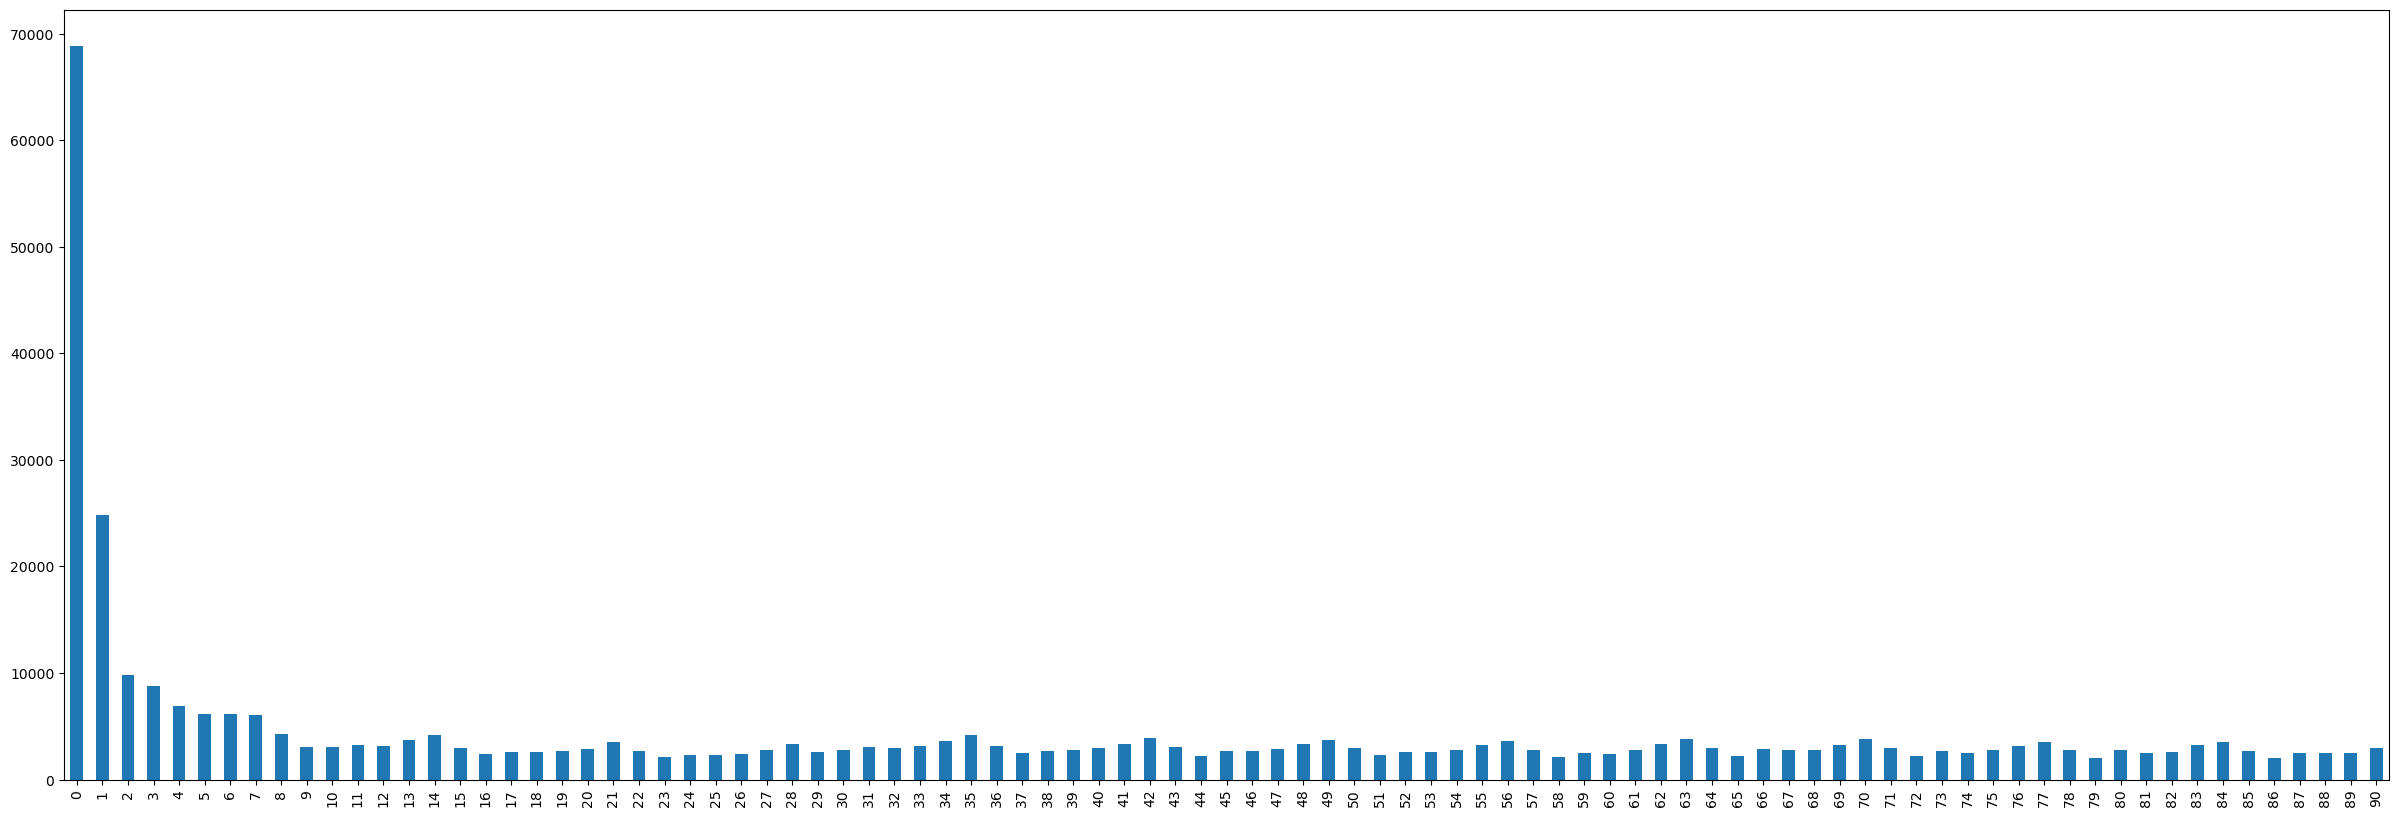

In [48]:
merged_left.DayUsed.value_counts().sort_index().loc[:90].plot(kind='bar', figsize=(30,10))

<Axes: >

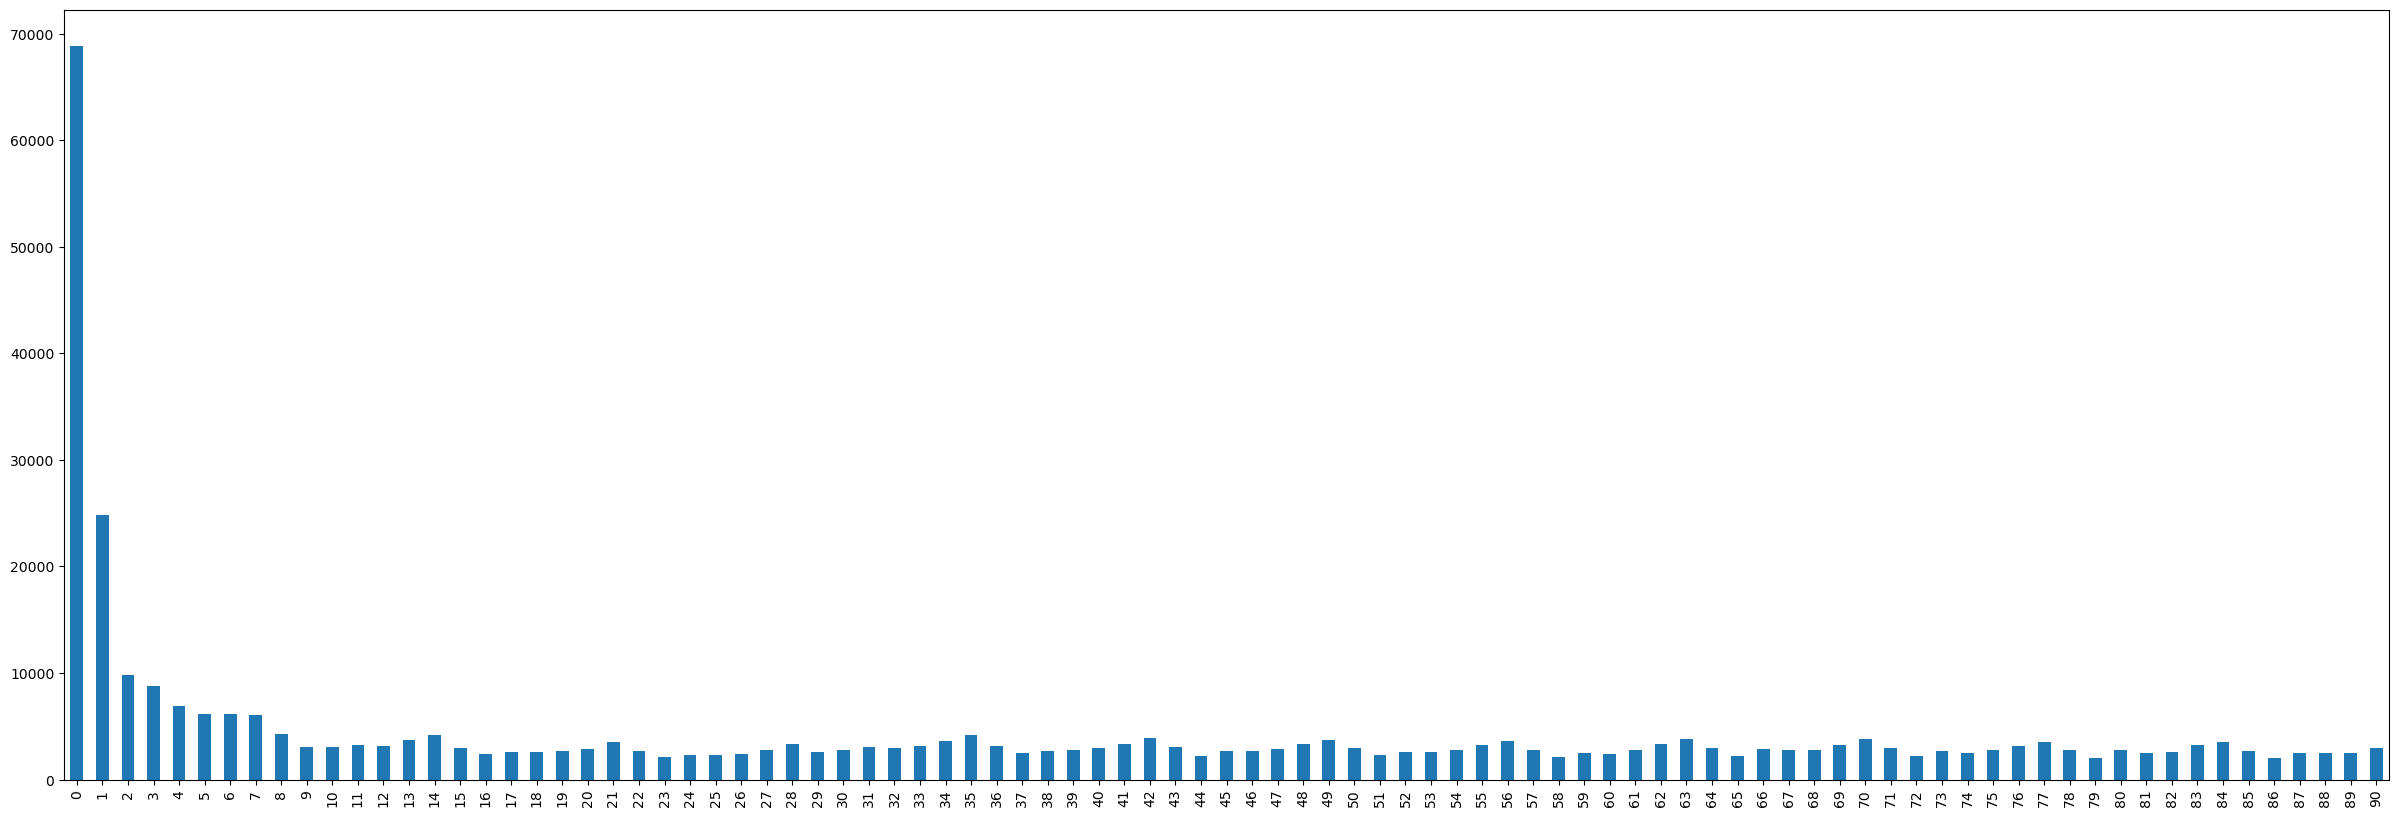

In [49]:
merged_left.DayUsed.value_counts().sort_index().loc[:90].plot(kind='bar', figsize=(30,10))

In [50]:
merged_left[merged_left['DayUsed']<0]

,TeklifId,SalesId,MusteriKodu,satisyapan,SatisTipi,SozlesmeNo,SatisGirisTarihi,Donem,SozlesmeBaslangic,SozlesmeBitis,MarkaAdi,UrunAdi,UrunTanimi,PaketAdi,BirimAdet,UrunGelir,PaylasimOrani,EkUrunMu,PaketKodu,SozlesmePaketi,YenilemeTipi,IsGunu,IsGunu_Kosul,UrunGrubu,AnaUrunGrubu,Butce_Urun,Butce_Urun2,ListeFiyati,UniqId,FirmCode,Segment,FirmKey,CompanyRightLogKey,CompanyRightKey,UsageCount,CreationDate,LastModifiedDate,CompanyRightKey.1,FirmKey.1,CompanyRightTypeKey,Right,UsedRight,ContractEndDate,Priority,RightStartDate,LastModifyDate,IsActive,ActivationTypeId,ContDuration,DayUsed,MonthUsed


In [51]:
def month_difference(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    start_month = start_date.year * 12 + start_date.month
    end_month = end_date.year * 12 + end_date.month
    return end_month - start_month

In [52]:
merged_left['MonthUsed'] = merged_left.apply(lambda row: month_difference(row['RightStartDate'], row['CreationDate']), axis=1)


In [53]:
merged_left['MonthUsed'] = ((merged_left['CreationDate'].dt.date - merged_left['RightStartDate'].dt.date)/np.timedelta64(1, 'M')).astype(int)
                                    

In [54]:
merged_left[merged_left['MonthUsed']<0]

,TeklifId,SalesId,MusteriKodu,satisyapan,SatisTipi,SozlesmeNo,SatisGirisTarihi,Donem,SozlesmeBaslangic,SozlesmeBitis,MarkaAdi,UrunAdi,UrunTanimi,PaketAdi,BirimAdet,UrunGelir,PaylasimOrani,EkUrunMu,PaketKodu,SozlesmePaketi,YenilemeTipi,IsGunu,IsGunu_Kosul,UrunGrubu,AnaUrunGrubu,Butce_Urun,Butce_Urun2,ListeFiyati,UniqId,FirmCode,Segment,FirmKey,CompanyRightLogKey,CompanyRightKey,UsageCount,CreationDate,LastModifiedDate,CompanyRightKey.1,FirmKey.1,CompanyRightTypeKey,Right,UsedRight,ContractEndDate,Priority,RightStartDate,LastModifyDate,IsActive,ActivationTypeId,ContDuration,DayUsed,MonthUsed


<Axes: >

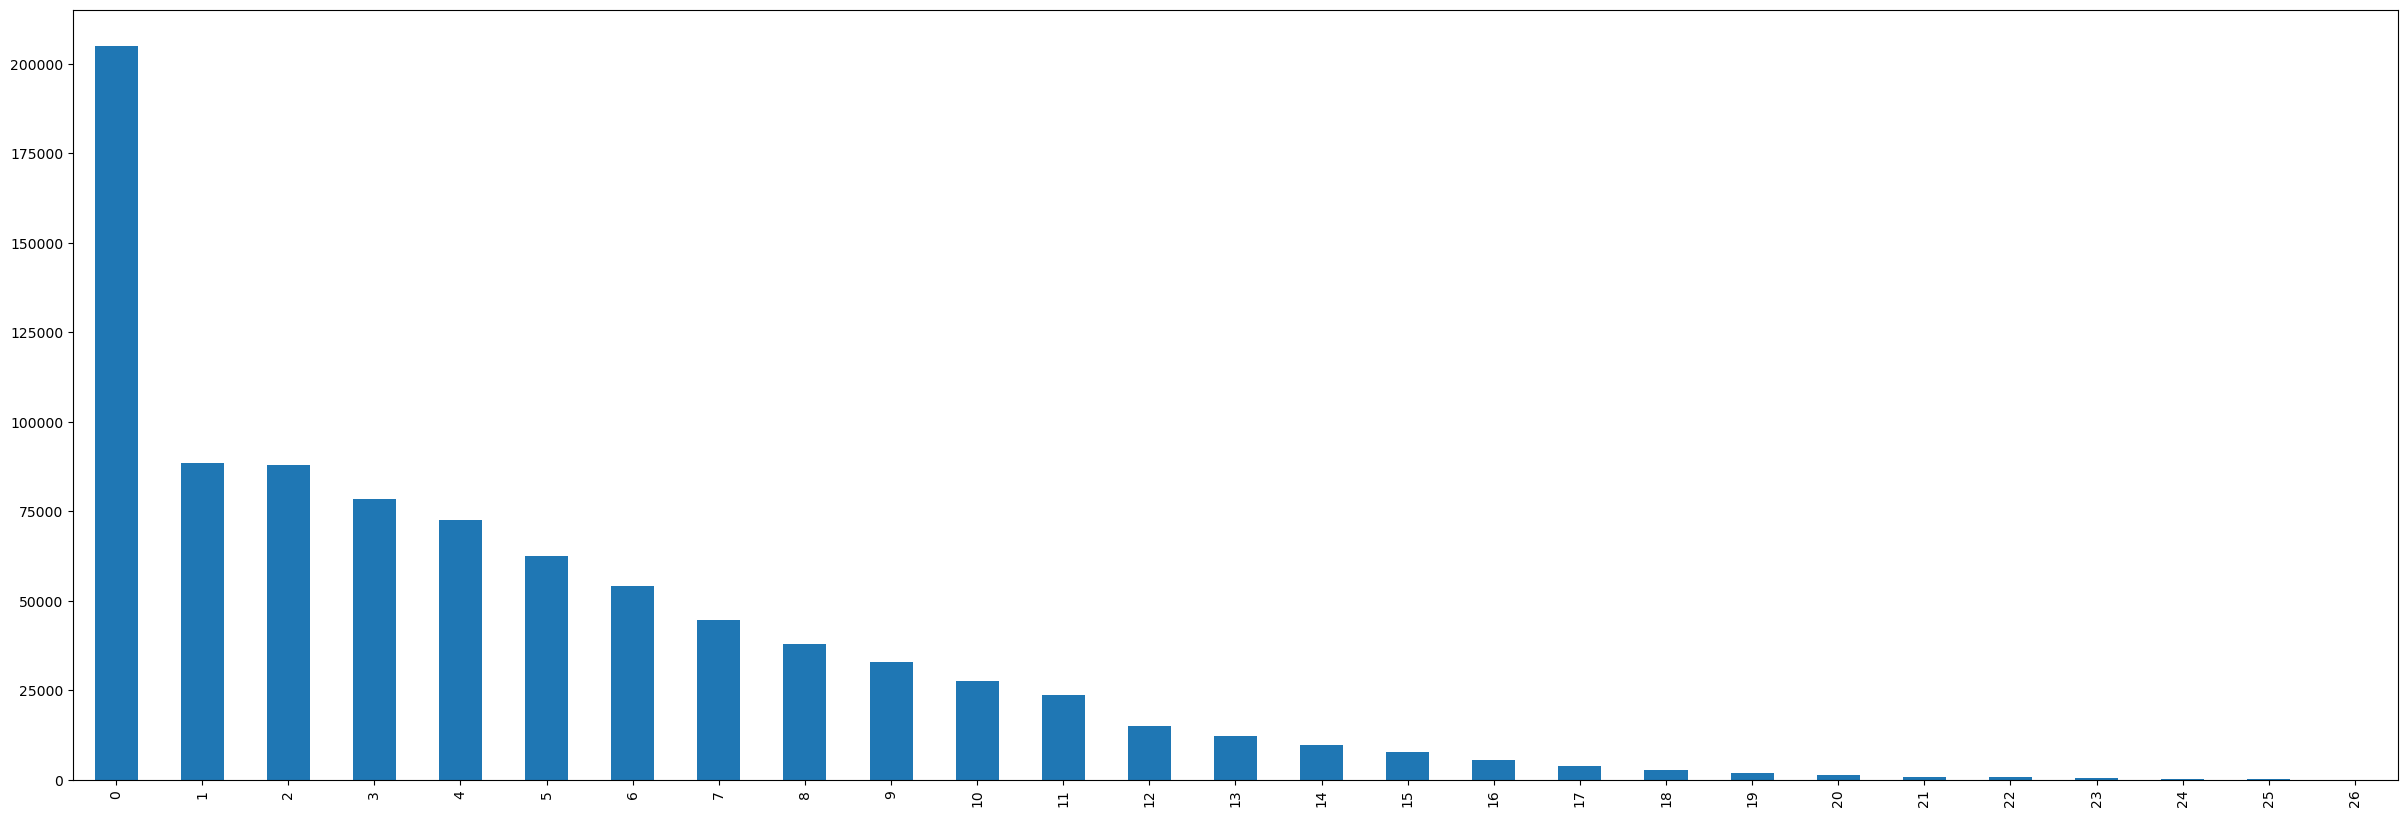

In [55]:
merged_left.MonthUsed.value_counts().sort_index().loc[:36].plot(kind='bar', figsize=(30,10))

#gün bazlı bakıldığında bariz sezonsallık var ama biz ay bazlı ilgileniyoruz.

# Feature oluşturma:

In [56]:
merged_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876101 entries, 0 to 879509
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TeklifId             876101 non-null  int64         
 1   SalesId              876101 non-null  int64         
 2   MusteriKodu          876101 non-null  int64         
 3   satisyapan           876101 non-null  object        
 4   SatisTipi            876101 non-null  object        
 5   SozlesmeNo           876101 non-null  object        
 6   SatisGirisTarihi     876101 non-null  object        
 7   Donem                876101 non-null  object        
 8   SozlesmeBaslangic    876101 non-null  datetime64[ns]
 9   SozlesmeBitis        876101 non-null  datetime64[ns]
 10  MarkaAdi             876101 non-null  object        
 11  UrunAdi              876101 non-null  object        
 12  UrunTanimi           876101 non-null  object        
 13  PaketAdi      

In [57]:
merged_left = merged_left.sort_values(by='CreationDate')

In [58]:
merged_left[merged_left['CompanyRightKey'] ==1494577.0]['FirmKey.1'].value_counts()

31806.0    3882
Name: FirmKey.1, dtype: int64

In [59]:
"""böyle çalıştırmıyorum.
merged_left2 = pd.DataFrame(columns=merged_left.columns)
for companyrightkey in merged_left['CompanyRightKey'].unique():
    a = merged_left[merged_left['CompanyRightKey']==companyrightkey].reset_index(drop = True)
    a['RightStock'] = 0
    a.RightStock.loc[0] = a.Right.loc[0] - 1
    if a.shape[0]!=1:
        for i in range(len(a.RightStock[1:])):
            a.RightStock.loc[i+1] = a.RightStock.loc[i] - a.UsageCount[i+1]
    merged_left2 = pd.concat([merged_left2, a])"""


"böyle çalıştırmıyorum.\nmerged_left2 = pd.DataFrame(columns=merged_left.columns)\nfor companyrightkey in merged_left['CompanyRightKey'].unique():\n    a = merged_left[merged_left['CompanyRightKey']==companyrightkey].reset_index(drop = True)\n    a['RightStock'] = 0\n    a.RightStock.loc[0] = a.Right.loc[0] - 1\n    if a.shape[0]!=1:\n        for i in range(len(a.RightStock[1:])):\n            a.RightStock.loc[i+1] = a.RightStock.loc[i] - a.UsageCount[i+1]\n    merged_left2 = pd.concat([merged_left2, a])"

In [60]:
def calculate_remaining_rights(df):
    df = df.sort_values(by='CreationDate')  # Ensure the dataframe is sorted by usage date
    df['RemainingRights'] = df['Right'] - df['UsageCount'].cumsum()
    df['RemainingMonths'] = df['ContDuration'] - df['MonthUsed']
    return df

df_with_remaining_rights = merged_left.groupby('CompanyRightKey').apply(calculate_remaining_rights)


In [61]:
df_with_remaining_rights[df_with_remaining_rights['CompanyRightKey']==1408740.0]

TeklifId  SalesId  MusteriKodu    satisyapan  \
CompanyRightKey                                                        
1408740.0       597589   1638168  1525671       256947  buse.akagac3   
                597590   1638168  1525671       256947  buse.akagac3   
                597588   1638168  1525671       256947  buse.akagac3   

                       SatisTipi     SozlesmeNo         SatisGirisTarihi  \
CompanyRightKey                                                            
1408740.0       597589    Online  20210101-1007  2021-01-01 17:52:45.447   
                597590    Online  20210101-1007  2021-01-01 17:52:45.447   
                597588    Online  20210101-1007  2021-01-01 17:52:45.447   

                             Donem SozlesmeBaslangic SozlesmeBitis  \
CompanyRightKey                                                      
1408740.0       597589  2021-01-01        2021-01-01    2022-01-01   
                597590  2021-01-01        2021-01-01    2022-01-01   
                597588  2021-01-01        2021-01-01    2022-01-01   

                           MarkaAdi UrunAdi UrunTanimi PaketAdi  BirimAdet  \
CompanyRightKey                                                              
1408740.0       597589  Kariyer.net    İlan       İlan   3 İlan          3   
                597590  Kariyer.net    İlan       İlan   3 İlan          3   
                597588  Kariyer.net    İlan       İlan   3 İlan          3   

                        UrunGelir  PaylasimOrani  EkUrunMu  \
CompanyRightKey                                              
1408740.0       597589     3322.0            1.0         0   
                597590     3322.0            1.0         0   
                597588     3322.0            1.0         0   

                                            PaketKodu SozlesmePaketi  \
CompanyRightKey                                                        
1408740.0       597589  3Ilan_Y1730_365_C99_PID_11696         3 İlan   
                597590  3Ilan_Y1730_365_C99_PID_11696         3 İlan   
                597588  3Ilan_Y1730_365_C99_PID_11696         3 İlan   

                       YenilemeTipi  IsGunu  IsGunu_Kosul UrunGrubu  \
CompanyRightKey                                                       
1408740.0       597589     Pasiften     0.0             1      İlan   
                597590     Pasiften     0.0             1      İlan   
                597588     Pasiften     0.0             1      İlan   

                                       AnaUrunGrubu Butce_Urun Butce_Urun2  \
CompanyRightKey                                                              
1408740.0       597589  İlan ve Performans Ürünleri       Core    Pasiften   
                597590  İlan ve Performans Ürünleri       Core    Pasiften   
                597588  İlan ve Performans Ürünleri       Core    Pasiften   

                        ListeFiyati           UniqId  FirmCode  \
CompanyRightKey                                                  
1408740.0       597589       3390.0  567350-622931-8     55345   
                597590       3390.0  567350-622931-8     55345   
                597588       3390.0  567350-622931-8     55345   

                                Segment  FirmKey  CompanyRightLogKey  \
CompanyRightKey                                                        
1408740.0       597589  Kariyer Classic  54245.0           2882047.0   
                597590  Kariyer Classic  54245.0           2882565.0   
                597588  Kariyer Classic  54245.0           3184971.0   

                        CompanyRightKey  UsageCount CreationDate  \
CompanyRightKey                                                    
1408740.0       597589        1408740.0         1.0   2021-01-01   
                597590        1408740.0         1.0   2021-01-02   
                597588        1408740.0         1.0   2021-02-24   

                                  LastModifiedDate  CompanyRightKey.1  \
CompanyRightKey

In [63]:
df_with_remaining_rights[df_with_remaining_rights['Right']!=df_with_remaining_rights['UsedRight']]

TeklifId  SalesId  MusteriKodu       satisyapan  \
CompanyRightKey                                                           
1408937.0       77970    1637721  1525624         5097      gizem.uzun2   
                77971    1637721  1525624         5097      gizem.uzun2   
                77985    1637721  1525624         5097      gizem.uzun2   
                77972    1637721  1525624         5097      gizem.uzun2   
                77973    1637721  1525624         5097      gizem.uzun2   
...                          ...      ...          ...              ...   
2216631.0       656847   2402300  1834901       550128  naile.yanardag2   
2216651.0       491321   2402053  1834761       131136   serhat.sarvan2   
2216917.0       342269   2391882  1831100        53215       tugce.yuce   
                342270   2391882  1831100        53215       tugce.yuce   
2217734.0       71953    2197552  1754744          685     burcu.cebeci   

                       SatisTipi     SozlesmeNo         SatisGirisTarihi  \
CompanyRightKey                                                            
1408937.0       77970    Offline  20210104-1097  2021-01-04 13:24:31.847   
                77971    Offline  20210104-1097  2021-01-04 13:24:31.847   
                77985    Offline  20210104-1097  2021-01-04 13:24:31.847   
                77972    Offline  20210104-1097  2021-01-04 13:24:31.847   
                77973    Offline  20210104-1097  2021-01-04 13:24:31.847   
...                          ...            ...                      ...   
2216631.0       656847   Offline  20230428-1534  2023-04-28 16:44:46.247   
2216651.0       491321   Offline  20230428-1371  2023-04-28 16:49:56.013   
2216917.0       342269   Offline  20230417-1372  2023-04-18 15:23:50.053   
                342270   Offline  20230417-1372  2023-04-18 15:23:50.053   
2217734.0       71953    Offline  20220930-1879  2022-09-30 20:22:46.043   

                             Donem SozlesmeBaslangic SozlesmeBitis  \
CompanyRightKey                                                      
1408937.0       77970   2020-12-31        2020-12-31    2021-12-31   
                77971   2020-12-31        2020-12-31    2021-12-31   
                77985   2020-12-31        2020-12-31    2021-12-31   
                77972   2020-12-31        2020-12-31    2021-12-31   
                77973   2020-12-31        2020-12-31    2021-12-31   
...                            ...               ...           ...   
2216631.0       656847  2023-04-28        2023-04-28    2024-10-27   
2216651.0       491321  2023-04-28        2023-04-28    2024-04-27   
2216917.0       342269  2023-04-30        2023-04-30    2025-04-29   
                342270  2023-04-30        2023-04-30    2025-04-29   
2217734.0       71953   2022-09-30        2022-09-30    2024-09-29   

                           MarkaAdi UrunAdi UrunTanimi   PaketAdi  BirimAdet  \
CompanyRightKey                                                                
1408937.0       77970   Kariyer.net    İlan       İlan   100 İlan        100   
                77971   Kariyer.net    İlan       İlan   100 İlan        100   
                77985   Kariyer.net    İlan       İlan   100 İlan        100   
                77972   Kariyer.net    İlan       İlan   100 İlan        100   
                77973   Kariyer.net    İlan       İlan   100 İlan        100   
...                             ...     ...        ...        ...        ...   
2216631.0       656847  Kariyer.net    İlan       İlan    12 İlan         12   
2216651.0       491321  Kariyer.net    İlan       İlan    12 İlan         12   
2216917.0       342269  Kariyer.net    İlan       İlan   450 İlan        450   
                342270  Kariyer.net    İlan       İlan   450 İlan        450   
2217734.0       71953   Kariyer.net    İlan       İlan  1500 İlan       1500   

                        UrunGelir  PaylasimOrani  EkUrunMu  \
CompanyRightKey                              

In [64]:
df_with_remaining_rights

TeklifId  SalesId  MusteriKodu      satisyapan  \
CompanyRightKey                                                          
1408736.0       826433   1638163  1525666      1434819  serife.asiran2   
1408737.0       772895   1634711  1525533      1082744    seyma.sahin6   
1408738.0       518405   1638166  1525669       155511      elif.sahin   
1408740.0       597589   1638168  1525671       256947    buse.akagac3   
                597590   1638168  1525671       256947    buse.akagac3   
...                          ...      ...          ...             ...   
2217784.0       869007   2402035  1834791      1976635  hatice.tekeli4   
2217973.0       463213   2401392  1834502       106756  zeynep.kaynar4   
2218097.0       369203   2297315  1797990        59955     kemal.ertit   
2218585.0       847557   2401590  1834869      1658133   tulin.tugbay3   
                847556   2401590  1834869      1658133   tulin.tugbay3   

                       SatisTipi     SozlesmeNo         SatisGirisTarihi  \
CompanyRightKey                                                            
1408736.0       826433    Online  20210101-1001  2021-01-01 11:35:31.617   
1408737.0       772895   Offline  20210101-1002  2021-01-01 11:57:24.320   
1408738.0       518405    Online  20210101-1005  2021-01-01 17:30:24.540   
1408740.0       597589    Online  20210101-1007  2021-01-01 17:52:45.447   
                597590    Online  20210101-1007  2021-01-01 17:52:45.447   
...                          ...            ...                      ...   
2217784.0       869007   Offline  20230428-1405  2023-04-28 15:15:11.493   
2217973.0       463213   Offline  20230428-1078  2023-04-28 10:38:40.937   
2218097.0       369203   Offline  20230111-1053  2023-01-11 10:43:03.597   
2218585.0       847557   Offline  20230428-1497  2023-04-28 16:27:20.560   
                847556   Offline  20230428-1497  2023-04-28 16:27:20.560   

                             Donem SozlesmeBaslangic SozlesmeBitis  \
CompanyRightKey                                                      
1408736.0       826433  2021-01-01        2021-01-01    2022-01-01   
1408737.0       772895  2021-01-01        2021-01-01    2022-01-01   
1408738.0       518405  2021-01-01        2021-01-01    2022-01-01   
1408740.0       597589  2021-01-01        2021-01-01    2022-01-01   
                597590  2021-01-01        2021-01-01    2022-01-01   
...                            ...               ...           ...   
2217784.0       869007  2023-04-28        2023-04-28    2024-04-27   
2217973.0       463213  2023-04-28        2023-04-28    2024-04-27   
2218097.0       369203  2023-01-11        2023-01-11    2025-01-10   
2218585.0       847557  2023-04-28        2023-04-28    2024-04-27   
                847556  2023-04-28        2023-04-28    2024-04-27   

                           MarkaAdi UrunAdi UrunTanimi        PaketAdi  \
CompanyRightKey                                                          
1408736.0       826433  Kariyer.net    İlan       İlan         Avantaj   
1408737.0       772895  Kariyer.net    İlan       İlan        Tek İlan   
1408738.0       518405  Kariyer.net    İlan       İlan        Tek İlan   
1408740.0       597589  Kariyer.net    İlan       İlan          3 İlan   
                597590  Kariyer.net    İlan       İlan          3 İlan   
...                             ...     ...        ...             ...   
2217784.0       869007  Kariyer.net    İlan       İlan          6 İlan   
2217973.0       463213  Kariyer.net    İlan       İlan          3 İlan   
2218097.0       369203  Kariyer.net    İlan       İlan        300 İlan   
2218585.0       847557  Kariyer.net    İlan       İlan  12 Akıllı İlan   
                847556  Kariyer.net    İlan       İlan  12 Akıllı İlan   

                        BirimAdet  UrunGelir  PaylasimOrani  EkUrunMu  \
CompanyRightKey                                                         
1408736.0       826433          1     499.00        

In [65]:
df_with_remaining_rights.drop(['TeklifId','SalesId','MusteriKodu','satisyapan','SatisTipi','SozlesmeNo','SatisGirisTarihi','Donem','MarkaAdi','UrunAdi','UrunTanimi','UrunGelir','PaylasimOrani','EkUrunMu','PaketKodu','SozlesmePaketi','IsGunu_Kosul','UrunGrubu','AnaUrunGrubu','Butce_Urun','ListeFiyati','UniqId','CompanyRightKey.1','FirmKey.1','ActivationTypeId'],axis=1,inplace=True)

In [66]:
df_with_remaining_rights[df_with_remaining_rights['IsActive']==False]

,,SozlesmeBaslangic,SozlesmeBitis,PaketAdi,BirimAdet,YenilemeTipi,IsGunu,Butce_Urun2,FirmCode,Segment,FirmKey,CompanyRightLogKey,CompanyRightKey,UsageCount,CreationDate,LastModifiedDate,CompanyRightTypeKey,Right,UsedRight,ContractEndDate,Priority,RightStartDate,LastModifyDate,IsActive,ContDuration,DayUsed,MonthUsed,RemainingRights,RemainingMonths
CompanyRightKey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [67]:
df_with_remaining_rights.drop(['SozlesmeBaslangic','SozlesmeBitis','FirmCode','IsActive','Butce_Urun2','YenilemeTipi'],axis=1,inplace=True)

In [68]:
df_with_remaining_rights.drop(['CompanyRightTypeKey','LastModifyDate','LastModifiedDate','CompanyRightLogKey','IsGunu','BirimAdet','PaketAdi'],axis=1,inplace=True)

In [69]:
df_with_remaining_rights

Segment   FirmKey  CompanyRightKey  \
CompanyRightKey                                                           
1408736.0       826433       Kariyer Classic  239436.0        1408736.0   
1408737.0       772895       Kariyer Classic  197805.0        1408737.0   
1408738.0       518405          Kariyer Plus  208708.0        1408738.0   
1408740.0       597589       Kariyer Classic   54245.0        1408740.0   
                597590       Kariyer Classic   54245.0        1408740.0   
...                                      ...       ...              ...   
2217784.0       869007       Kariyer Classic  292704.0        2217784.0   
2217973.0       463213       Kariyer Classic   23359.0        2217973.0   
2218097.0       369203  Kariyer Professional   44298.0        2218097.0   
2218585.0       847557       Kariyer Classic  259221.0        2218585.0   
                847556       Kariyer Classic  259221.0        2218585.0   

                        UsageCount CreationDate  Right  UsedRight  \
CompanyRightKey                                                     
1408736.0       826433         1.0   2021-01-01    1.0        1.0   
1408737.0       772895         1.0   2021-01-04    1.0        1.0   
1408738.0       518405         1.0   2021-01-01    1.0        1.0   
1408740.0       597589         1.0   2021-01-01    3.0        3.0   
                597590         1.0   2021-01-02    3.0        3.0   
...                            ...          ...    ...        ...   
2217784.0       869007         1.0   2023-05-02    1.0        1.0   
2217973.0       463213         1.0   2023-05-02    1.0        1.0   
2218097.0       369203         1.0   2023-05-02    1.0        1.0   
2218585.0       847557         1.0   2023-05-02    2.0        2.0   
                847556         1.0   2023-05-02    2.0        2.0   

                       ContractEndDate  Priority RightStartDate  ContDuration  \
CompanyRightKey                                                                 
1408736.0       826433      2022-01-01      50.0     2021-01-01          12.0   
1408737.0       772895      2022-01-01      50.0     2021-01-01          12.0   
1408738.0       518405      2022-01-01      50.0     2021-01-01          12.0   
1408740.0       597589      2022-01-01      50.0     2021-01-01          12.0   
                597590      2022-01-01      50.0     2021-01-01          12.0   
...                                ...       ...            ...           ...   
2217784.0       869007      2023-08-02      10.0     2023-05-02           4.0   
2217973.0       463213      2023-07-31      10.0     2023-05-02           3.0   
2218097.0       369203      2025-01-10      10.0     2023-05-02          21.0   
2218585.0       847557      2024-04-27      10.0     2023-05-02          12.0   
                847556      2024-04-27      10.0     2023-05-02          12.0   

                        DayUsed  MonthUsed  RemainingRights  RemainingMonths  
CompanyRightKey                                                               
1408736.0       826433        0          0              0.0             12.0  
1408737.0       772895        3          0              0.0             12.0  
1408738.0       518405        0          0              0.0             12.0  
1408740.0       597589        0          0              2.0             12.0  
                597590        1          0              1.0             12.0  
...                         ...        ...              ...              ...  
2217784.0       869007        0          0              0.0              4.0  
2217973.0       463213        0          0              0.0              3.0  
2218097.0       369203        0          0              0.0             21.0  
2218585.0       847557        0          0              1.0             12.0  
                847556        0          0              0.0             12.0  

[876101 rows x 15 columns]

In [70]:
df_with_remaining_rights['CreationDate'] = pd.to_datetime(df_with_remaining_rights['CreationDate'])
df_with_remaining_rights['YearMonth'] = df_with_remaining_rights['CreationDate'].dt.to_period('M')

In [71]:
df_with_remaining_rights.reset_index(drop=True,inplace=True)

In [72]:
temp = df_with_remaining_rights.groupby(['FirmKey','CompanyRightKey','YearMonth']).agg({'RemainingRights': 'last','UsageCount':'sum','ContDuration':'first','MonthUsed':'first','RemainingMonths':'first','Segment':'first'})


In [73]:
temp.reset_index(inplace=True)

In [74]:
date_range = pd.date_range(start=temp.YearMonth.min().to_timestamp(), end=temp.YearMonth.max().to_timestamp(), freq='MS').to_period('M')


In [75]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282690 entries, 0 to 282689
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype    
---  ------           --------------   -----    
 0   FirmKey          282690 non-null  float64  
 1   CompanyRightKey  282690 non-null  float64  
 2   YearMonth        282690 non-null  period[M]
 3   RemainingRights  282690 non-null  float64  
 4   UsageCount       282690 non-null  float64  
 5   ContDuration     282690 non-null  float64  
 6   MonthUsed        282690 non-null  int64    
 7   RemainingMonths  282690 non-null  float64  
 8   Segment          282690 non-null  object   
dtypes: float64(6), int64(1), object(1), period[M](1)
memory usage: 19.4+ MB


In [76]:
temp

,FirmKey,CompanyRightKey,YearMonth,RemainingRights,UsageCount,ContDuration,MonthUsed,RemainingMonths,Segment
0,1.0,1879141.0,2022-09,39.0,1.0,24.0,0,24.0,Kariyer Professional
1,1.0,1879141.0,2022-11,37.0,2.0,24.0,2,22.0,Kariyer Professional
2,1.0,1879141.0,2023-02,36.0,1.0,24.0,5,19.0,Kariyer Professional
3,1.0,1879141.0,2023-03,34.0,2.0,24.0,6,18.0,Kariyer Professional
4,1.0,1879141.0,2023-04,32.0,2.0,24.0,7,17.0,Kariyer Professional
...,...,...,...,...,...,...,...,...,...
282685,345183.0,2213985.0,2023-04,3.0,1.0,12.0,0,12.0,Kariyer Classic
282686,345187.0,2213813.0,2023-04,2.0,2.0,12.0,0,12.0,Kariyer Classic
282687,345194.0,2214238.0,2023-04,0.0,1.0,12.0,0,12.0,Kariyer Classic
282688,345231.0,2213829.0,2023-04,2.0,1.0,12.0,0,12.0,Kariyer Classic


In [77]:
temp.set_index('YearMonth', inplace=True)


In [80]:
temp

,FirmKey,CompanyRightKey,RemainingRights,UsageCount,ContDuration,MonthUsed,RemainingMonths,Segment
YearMonth,,,,,,,,
2022-09,1.0,1879141.0,39.0,1.0,24.0,0,24.0,Kariyer Professional
2022-11,1.0,1879141.0,37.0,2.0,24.0,2,22.0,Kariyer Professional
2023-02,1.0,1879141.0,36.0,1.0,24.0,5,19.0,Kariyer Professional
2023-03,1.0,1879141.0,34.0,2.0,24.0,6,18.0,Kariyer Professional
2023-04,1.0,1879141.0,32.0,2.0,24.0,7,17.0,Kariyer Professional
...,...,...,...,...,...,...,...,...
2023-04,345183.0,2213985.0,3.0,1.0,12.0,0,12.0,Kariyer Classic
2023-04,345187.0,2213813.0,2.0,2.0,12.0,0,12.0,Kariyer Classic
2023-04,345194.0,2214238.0,0.0,1.0,12.0,0,12.0,Kariyer Classic


In [81]:
min_date = temp.index.min()
max_date = temp.index.max()


In [83]:
min_date.to_timestamp()

Timestamp('2021-01-01 00:00:00')

In [84]:
date_range = pd.date_range(start=min_date.to_timestamp(), end=max_date.to_timestamp(), freq='M').to_period('M')

In [85]:
date_range

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04'],
            dtype='period[M]')

In [87]:
temp.groupby(['FirmKey','YearMonth']).agg({'RemainingRights': 'sum'})

RemainingRights
FirmKey  YearMonth                 
1.0      2022-09               39.0
         2022-11               37.0
         2023-02               36.0
         2023-03               34.0
         2023-04               32.0
...                             ...
345183.0 2023-04                3.0
345187.0 2023-04                2.0
345194.0 2023-04                0.0
345231.0 2023-04                2.0
345241.0 2023-04                3.0

[266396 rows x 1 columns]

In [88]:
df_with_remaining_rights[df_with_remaining_rights['FirmKey']==9]

,Segment,FirmKey,CompanyRightKey,UsageCount,CreationDate,Right,UsedRight,ContractEndDate,Priority,RightStartDate,ContDuration,DayUsed,MonthUsed,RemainingRights,RemainingMonths,YearMonth
244655,Kariyer Plus,9.0,1568964.0,1.0,2021-09-13,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,0,0,11.0,21.0,2021-09
244656,Kariyer Plus,9.0,1568964.0,1.0,2021-11-12,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,60,1,10.0,20.0,2021-11
244657,Kariyer Plus,9.0,1568964.0,1.0,2021-11-19,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,67,2,9.0,19.0,2021-11
244658,Kariyer Plus,9.0,1568964.0,1.0,2022-01-04,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,113,3,8.0,18.0,2022-01
244659,Kariyer Plus,9.0,1568964.0,1.0,2022-02-02,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,142,4,7.0,17.0,2022-02
244660,Kariyer Plus,9.0,1568964.0,1.0,2022-04-14,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,213,6,6.0,15.0,2022-04
244661,Kariyer Plus,9.0,1568964.0,1.0,2022-05-09,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,238,7,5.0,14.0,2022-05
244662,Kariyer Plus,9.0,1568964.0,1.0,2022-05-26,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,255,8,4.0,13.0,2022-05
244663,Kariyer Plus,9.0,1568964.0,1.0,2022-09-02,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,354,11,3.0,10.0,2022-09
244664,Kariyer Plus,9.0,1568964.0,1.0,2022-09-02,12.0,12.0,2023-06-13,50.0,2021-09-13,21.0,354,11,2.0,10.0,2022-09


In [89]:
temp.reset_index(inplace=True)

In [90]:
temp = temp.groupby(['FirmKey','YearMonth']).agg({'RemainingRights': 'sum','UsageCount':'sum','ContDuration':'min','MonthUsed':'max','Segment':'first','RemainingMonths':'min'})

In [91]:
temp.reset_index(inplace=True)

In [92]:
temp.columns

Index(['FirmKey', 'YearMonth', 'RemainingRights', 'UsageCount', 'ContDuration',
       'MonthUsed', 'Segment', 'RemainingMonths'],
      dtype='object')

In [93]:
temp.drop(['MonthUsed'],axis=1,inplace=True)

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Veri son hali hazırlık: çalışması 40 dk civari sürüyor

In [98]:
%%time
last_df = pd.DataFrame()
min_date = temp.YearMonth.min()
max_date = temp.YearMonth.max()
record = 0
record1 = 0

for firmkey in temp.FirmKey.unique():
    product = temp[temp['FirmKey']==firmkey]
    segment = product.Segment.iloc[0]
    contduration = product.ContDuration.iloc[0]
    product.set_index('YearMonth',inplace=True)
    date_range = pd.date_range(start=min_date.to_timestamp(), end=max_date.to_timestamp(), freq='M').to_period('M')
    product = product.reindex(date_range, fill_value=None)
    #product.RemainingRights = product.RemainingRights.ffill()
    product.fillna(value=0,inplace=True)
    product.FirmKey = product.FirmKey.apply(lambda x:x if x!=0 else firmkey)
    product.ContDuration = product.ContDuration.apply(lambda x:x if x!=0 else contduration)
    product.Segment = product.Segment.apply(lambda x:x if x!=0 else segment)
    
    for i in range(len(product.RemainingMonths)):
        if (product.RemainingMonths.iloc[i] != 0):
            record = product.RemainingMonths.iloc[i]
            pass
        else:
            product.RemainingMonths.iloc[i] = record-1
            record = product.RemainingMonths.iloc[i]
            
    record_remaining_rights = 0
    record_cont_duration = 0

    for j in range(len(product.RemainingRights)):
        
        #record_remaining_rights = 
        
        if (product.UsageCount[j]==0)&(product.RemainingRights[j]==0):
            product.RemainingRights[j]= record_remaining_rights - product.UsageCount[j]
            record_remaining_rights = product.RemainingRights[j]
            
            product.ContDuration[j]= record_cont_duration
            record_cont_duration = product.ContDuration[j]           
            

        else:
            record_remaining_rights = product.RemainingRights[j]
            
            record_cont_duration = product.ContDuration[j]    
       
            
            
            
    product['RemainingMonths'].loc[product[(product['RemainingRights']==0)&(product['UsageCount']==0)].index] = 0
    product['ContDuration'].loc[product[(product['RemainingRights']==0)&(product['UsageCount']==0)].index] = 0
    
    last_df = pd.concat([last_df, product])

CPU times: user 43min 7s, sys: 14min 53s, total: 58min
Wall time: 1h 5min 22s


In [99]:
last_df[last_df['FirmKey']==9.0]

,FirmKey,RemainingRights,UsageCount,ContDuration,Segment,RemainingMonths
2021-01,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-02,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-03,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-04,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-05,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-06,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-07,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-08,9.0,0.0,0.0,0.0,Kariyer Plus,0.0
2021-09,9.0,11.0,1.0,21.0,Kariyer Plus,21.0
2021-10,9.0,11.0,0.0,21.0,Kariyer Plus,20.0


In [102]:
last_df.to_csv(r'last_df_new.csv')

In [103]:
dfmodel=pd.read_csv(r'last_df_new.csv')

In [104]:
dfmodel.rename(columns={'Unnamed: 0':'YearMonth'}, inplace=True)

In [106]:
"""dfmodel.drop(columns=['NextMonthUsageCount'],inplace=True)"""

"dfmodel.drop(columns=['NextMonthUsageCount'],inplace=True)"

In [107]:
dfmodel

,YearMonth,FirmKey,RemainingRights,UsageCount,ContDuration,Segment,RemainingMonths
0,2021-01,1.0,0.0,0.0,0.0,Kariyer Professional,0.0
1,2021-02,1.0,0.0,0.0,0.0,Kariyer Professional,0.0
2,2021-03,1.0,0.0,0.0,0.0,Kariyer Professional,0.0
3,2021-04,1.0,0.0,0.0,0.0,Kariyer Professional,0.0
4,2021-05,1.0,0.0,0.0,0.0,Kariyer Professional,0.0
...,...,...,...,...,...,...,...
1670475,2022-12,345241.0,0.0,0.0,0.0,Kariyer Classic,0.0
1670476,2023-01,345241.0,0.0,0.0,0.0,Kariyer Classic,0.0
1670477,2023-02,345241.0,0.0,0.0,0.0,Kariyer Classic,0.0
1670478,2023-03,345241.0,0.0,0.0,0.0,Kariyer Classic,0.0


In [108]:
dfmodel = dfmodel.sort_values('YearMonth')

In [109]:
dfmodel['Month'] = pd.to_datetime(dfmodel['YearMonth']).dt.month


In [110]:
dfmodel = pd.get_dummies(dfmodel, columns=['Segment'])


In [111]:
dfmodel

,YearMonth,FirmKey,RemainingRights,UsageCount,ContDuration,RemainingMonths,Month,Segment_Kariyer Classic,Segment_Kariyer Network,Segment_Kariyer Plus,Segment_Kariyer Professional,Segment_Potansiyel Müşteriler
0,2021-01,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
1229816,2021-01,267607.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
247352,2021-01,33663.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
1229844,2021-01,267611.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
247324,2021-01,33660.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075087,2023-04,246463.0,0.0,0.0,0.0,0.0,4,1,0,0,0,0
1075059,2023-04,246459.0,0.0,0.0,0.0,0.0,4,1,0,0,0,0
1075031,2023-04,246458.0,0.0,0.0,0.0,0.0,4,1,0,0,0,0
1074191,2023-04,246353.0,0.0,0.0,0.0,0.0,4,1,0,0,0,0


In [112]:
X_columns = ['RemainingRights', 'UsageCount', 'ContDuration', 'RemainingMonths', 'Month']
y_column = 'NextMonthUsageCount'

In [113]:
models = {}

In [114]:
results = pd.DataFrame(columns=['FirmKey','mse','rmse','mae','r2'],index=range(dfmodel['FirmKey'].nunique()))

In [115]:
results

,FirmKey,mse,rmse,mae,r2
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
59655,NaN,NaN,NaN,NaN,NaN
59656,NaN,NaN,NaN,NaN,NaN
59657,NaN,NaN,NaN,NaN,NaN
59658,NaN,NaN,NaN,NaN,NaN


In [116]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
#XGBRegressor for each FirmKey: --ASIL MODEL BU DEĞİL--

In [ ]:
"""

i=0
for firm_key in tqdm(dfmodel['FirmKey'].unique()):
    # Get the data for this FirmKey
    df_firm = dfmodel[dfmodel['FirmKey'] == firm_key]
    df_firm['NextMonthUsageCount'] = df_firm['UsageCount'].shift(-1)
    df_firm = df_firm[:-1]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df_firm[X_columns], df_firm[y_column], test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    # Store the model in the dictionary
    models[firm_key] = model
    # Generate predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #print('mse: ', mse, 'rmse: ', rmse, 'mae :', mae, 'r2: ', r2)
    results['FirmKey'][i]=firm_key
    results['mse'][i]=mse
    results['rmse'][i]=rmse
    results['mae'][i]=mae
    results['r2'][i]=r2
    i=i+1
    
    """


In [ ]:
"""results.to_csv('results_by_firmkey_xgboost.csv')"""

In [ ]:
"""results.r2.describe()"""

In [ ]:
"""results.mse.describe()"""

In [ ]:
"""

results.r2 = results.r2.astype(int)
results.mse = results.mse.astype(int)
results.rmse = results.rmse.astype(int)
results.mae = results.mae.astype(int)

"""

In [ ]:
#One XGBRegressor for all -bunu kullanmıyorum--

In [ ]:
"""
dfmodel = pd.read_csv('last_df.csv')

dfmodel.reset_index(inplace=True)

dfmodel.rename(columns={'Unnamed: 0':'YearMonth'}, inplace=True)
dfmodel = dfmodel.sort_values('YearMonth')

"""

In [ ]:
"""

# Define target variable
dfmodel['NextMonthUsageCount'] = dfmodel.groupby('FirmKey')['UsageCount'].shift(-1)

# Drop the last record for each FirmKey
dfmodel = dfmodel.groupby('FirmKey').apply(lambda group: group[:-1]).reset_index(drop=True).copy()
print(dfmodel.columns)
# Create a feature for Month
dfmodel['Month'] = pd.to_datetime(dfmodel['YearMonth']).dt.month

"""

In [ ]:
"""dfmodel.head(5)"""

In [ ]:
"""df = dfmodel.copy()"""

In [ ]:
"""

X = df.drop(['NextMonthUsageCount', 'YearMonth', 'FirmKey'], axis=1)
y = df['NextMonthUsageCount']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

"""

In [ ]:
"""results = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2'],index=[0])"""

In [ ]:
"""
results.MSE[0] = mse
results.RMSE[0] = rmse
results.MAE[0] = mae
results.R2[0] = r2

"""

In [ ]:
"""results.to_csv('one_model_for_all_xgr.csv')"""

In [ ]:
"""y_pred"""

In [ ]:
"""Linear regression -- bu modeli kullanmıyorum -- """

In [ ]:
"""

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assume you have the same X_train, X_test, y_train, y_test from previous split

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("MSE: ", mean_squared_error(y_test, lr_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("MAE: ", mean_absolute_error(y_test, lr_pred))
print("R2 Score: ", r2_score(y_test, lr_pred))

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Regressor Metrics:")
print("MSE: ", mean_squared_error(y_test, rf_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("MAE: ", mean_absolute_error(y_test, rf_pred))
print("R2 Score: ", r2_score(y_test, rf_pred))

"""

In [ ]:
"""print(lr_model.coef_)"""

In [ ]:
"""pd.DataFrame(y_pred).value_counts()"""

In [117]:
#Kullanıdığım asıl model aşağıdaki "XGB Classifier"

In [118]:
dfmodel = pd.read_csv('last_df.csv')

dfmodel.reset_index(inplace=True)

dfmodel.rename(columns={'Unnamed: 0':'YearMonth'}, inplace=True)
dfmodel = dfmodel.sort_values('YearMonth')

In [119]:
#bir ayda 1 ve birden çok ilan yayınlamış olanların UsageCount'ı 1'e çekildi.

In [120]:
dfmodel.UsageCount.loc[dfmodel[dfmodel.UsageCount >= 1].index] = 1

In [121]:
dfmodel[dfmodel.UsageCount > 1]

,index,YearMonth,FirmKey,RemainingRights,UsageCount,ContDuration,Segment,RemainingMonths


In [122]:
#gelecek ay ilan çıkmayacakları tahminlemek istediğimden (recall değerinde görülen) ilan yayınlamayanların UsageCount=1 yaptım.

In [123]:
dfmodel.UsageCount.loc[dfmodel[dfmodel.UsageCount == 1].index] = 2
dfmodel.UsageCount.loc[dfmodel[dfmodel.UsageCount == 0].index] = 1
dfmodel.UsageCount.loc[dfmodel[dfmodel.UsageCount == 2].index] = 0



In [124]:
# Define target variable
dfmodel['NextMonthUsageCount'] = dfmodel.groupby('FirmKey')['UsageCount'].shift(-1)

# Drop the last record for each FirmKey
dfmodel = dfmodel.groupby('FirmKey').apply(lambda group: group[:-1]).reset_index(drop=True).copy()
print(dfmodel.columns)
# Create a feature for Month
dfmodel['Month'] = pd.to_datetime(dfmodel['YearMonth']).dt.month

Index(['index', 'YearMonth', 'FirmKey', 'RemainingRights', 'UsageCount',
       'ContDuration', 'Segment', 'RemainingMonths', 'NextMonthUsageCount'],
      dtype='object')


In [125]:
dfmodel.YearMonth.unique()

array(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03'], dtype=object)

In [126]:
dfmodel.head(5)

,index,YearMonth,FirmKey,RemainingRights,UsageCount,ContDuration,Segment,RemainingMonths,NextMonthUsageCount,Month
0,0,2021-01,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,1
1,1,2021-02,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,2
2,2,2021-03,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,3
3,3,2021-04,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,4
4,4,2021-05,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,5


In [127]:
dfmodel.drop(columns=['YearMonth','index'],inplace=True)

In [128]:
df = dfmodel.copy()

In [129]:
df.head(5)

,FirmKey,RemainingRights,UsageCount,ContDuration,Segment,RemainingMonths,NextMonthUsageCount,Month
0,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,1
1,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,2
2,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,3
3,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,4
4,1.0,0.0,1.0,0.0,Kariyer Professional,0.0,1.0,5


In [130]:
len(df)*0.3

483246.0

In [131]:
#hakkı varken ilan çıkmamış satır sayısı:

In [132]:
index_list_RR_NMUC1 = list(df[(df['RemainingRights']>0)&(df['NextMonthUsageCount']==1)].index)

In [ ]:
"""index_list_RR0_NMUC0 = list(df[(df['RemainingRights']==0)&(df['NextMonthUsageCount']==0)].index)"""

In [133]:
#ilan çıkmamış satır sayısı toplamı:

In [134]:
df.shape[0]

1610820

In [135]:
df[df['NextMonthUsageCount']==1].shape[0]

1347850

In [136]:
df[df['NextMonthUsageCount']==1].shape[0]*0.3

404355.0

In [137]:
len(index_list_RR_NMUC1)

189782

In [138]:

from xgboost import XGBClassifier


# Prepare the dataset
X = df.drop(columns=['NextMonthUsageCount','FirmKey'], axis=1)
y = df['NextMonthUsageCount']
X = pd.get_dummies(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
y_train_index_list = y_train.index
y_test_index_list = y_test.index

# Create a XGBoost classifier object
xgb_clf = XGBClassifier()

# Train XGBoost Classifier
xgb_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.8797610326831469
Precision:  0.8923729812566309
Recall:  0.973708100299553
Confusion Matrix: 
 [[ 31501  47476]
 [ 10629 393640]]


In [ ]:
#Metrikleri doğrulamak için analiz:

In [139]:
X

,RemainingRights,UsageCount,ContDuration,RemainingMonths,Month,Segment_Kariyer Classic,Segment_Kariyer Network,Segment_Kariyer Plus,Segment_Kariyer Professional,Segment_Potansiyel Müşteriler
0,0.0,1.0,0.0,0.0,1,0,0,0,1,0
1,0.0,1.0,0.0,0.0,2,0,0,0,1,0
2,0.0,1.0,0.0,0.0,3,0,0,0,1,0
3,0.0,1.0,0.0,0.0,4,0,0,0,1,0
4,0.0,1.0,0.0,0.0,5,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1610815,0.0,1.0,0.0,0.0,11,1,0,0,0,0
1610816,0.0,1.0,0.0,0.0,12,1,0,0,0,0
1610817,0.0,1.0,0.0,0.0,1,1,0,0,0,0
1610818,0.0,1.0,0.0,0.0,2,1,0,0,0,0


In [140]:
df_index_list = pd.DataFrame(index_list_RR_NMUC1)

In [141]:
df_index_list

,0
0,20
1,22
2,23
3,35
4,37
...,...
189777,1597616
189778,1597751
189779,1597940
189780,1597994


In [142]:
df_index_list = df_index_list[df_index_list[0].isin(y_test_index_list)]

In [143]:
index_list_RR_NMUC1[:5]

[20, 22, 23, 35, 37]

In [144]:
df_index_list[0]

12             66
19            161
22            391
27            404
41            474
           ...   
189769    1596617
189771    1597238
189773    1597319
189774    1597346
189781    1598102
Name: 0, Length: 56980, dtype: int64

In [145]:
df_pred = pd.DataFrame(y_test)

In [146]:
df_index_list.shape[0]

56980

In [147]:
df_pred.loc[df_index_list[0]].NextMonthUsageCount.value_counts()

1.0    56980
Name: NextMonthUsageCount, dtype: int64

In [148]:
#yukarıdaki analize göre hakkı varken ilan çıkmamış satırın hepsi modelde ilan çıkmamış olarak tahmin edilmiş

In [ ]:
#aşağısı gereksiz alan, sonuçları kaydettim.

In [ ]:
df_pred.shape[0]

In [ ]:
len(y_pred)

In [ ]:
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall','ConfMatr'],index=[0])

In [ ]:
results.Accuracy[0] = accuracy_score(y_test, y_pred)
results.Precision[0] = precision_score(y_test, y_pred)
results.Recall[0] = recall_score(y_test, y_pred)
results.ConfMatr[0] = confusion_matrix(y_test, y_pred)

In [ ]:
results.to_csv('result_xgbclassifier.csv')